In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import tensorflow as tf

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
df= pd.read_csv(r"C:\Users\umair\balanced_Nbiot.csv")
balanced_df=df

In [4]:
balanced_df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,benign
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.0,0.0,benign
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.0,0.0,benign
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.0,0.0,benign
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,153.688534,209.362300,51475.879187,219.858244,242.027262,56787.500904,547.812321,298.195172,60928.481976,4983.493065,...,0.0,0.0,8678.383392,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai_udpplain
109996,154.645871,211.590861,51906.095775,220.821623,243.440043,56969.089730,548.781903,298.661304,60936.478575,4984.465393,...,0.0,0.0,8679.378573,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai_udpplain
109997,155.644338,213.790807,52321.045926,221.820309,244.840095,57145.104258,549.780815,299.125742,60944.013909,4985.464405,...,0.0,0.0,8680.378401,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai_udpplain
109998,154.834365,215.988053,52725.825097,221.268974,246.237308,57316.853508,549.496156,299.589574,60951.108872,4985.298237,...,0.0,0.0,8681.175334,554.000000,0.000013,554.000000,1.746230e-10,0.0,0.0,mirai_udpplain


In [5]:
balanced_df['type'].unique()

array(['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
       'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
       'mirai_udp', 'mirai_udpplain'], dtype=object)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# assume your dataframe is named 'df' and your output column is named 'target'

# separate the input features and the target variable
X =  balanced_df.drop('type', axis=1)
y = balanced_df['type']

# normalize the input features
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(88000, 115)

In [9]:
X_test.shape

(22000, 115)

In [10]:
y_train.shape

(88000,)

In [11]:
y_test.shape

(22000,)

In [ ]:
# train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.8537272727272728


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = model.predict(X_test)

# print the classification report
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       0.73      0.75      0.74      2002
   gafgyt_junk       0.74      0.71      0.72      1968
   gafgyt_scan       0.99      1.00      1.00      2034
    gafgyt_tcp       0.49      1.00      0.66      2011
    gafgyt_udp       0.00      0.00      0.00      2072
     mirai_ack       1.00      0.98      0.99      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       0.98      0.99      0.99      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           0.85     22000
     macro avg       0.81      0.86      0.83     22000
  weighted avg       0.81      0.85      0.82     22000



Text(0.5, 1.0, 'Confusion Matrix')

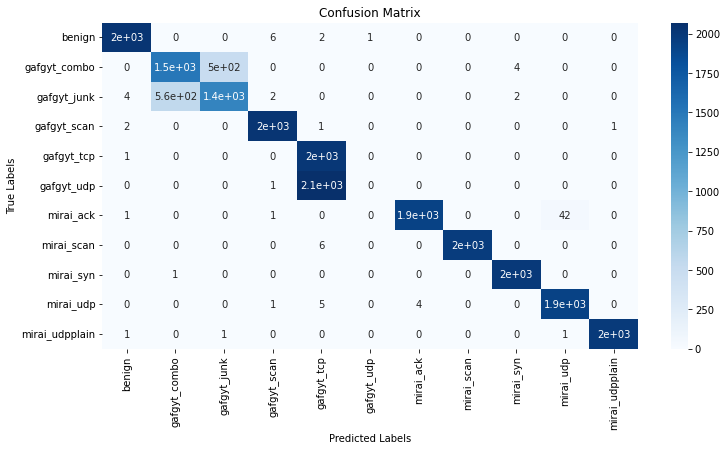

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = model.predict(X_test)

# create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


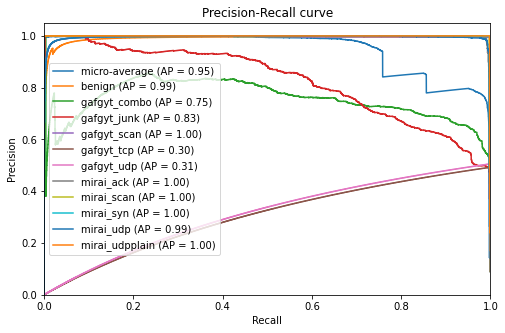

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = model.predict_proba(X_test)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# predict the class labels for the test data
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9998636363636364


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = rfc.predict(X_test)

# print the classification report
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       1.00      1.00      1.00      2002
   gafgyt_junk       1.00      1.00      1.00      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       1.00      1.00      1.00      2011
    gafgyt_udp       1.00      1.00      1.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           1.00     22000
     macro avg       1.00      1.00      1.00     22000
  weighted avg       1.00      1.00      1.00     22000



Text(0.5, 1.0, 'Confusion Matrix')

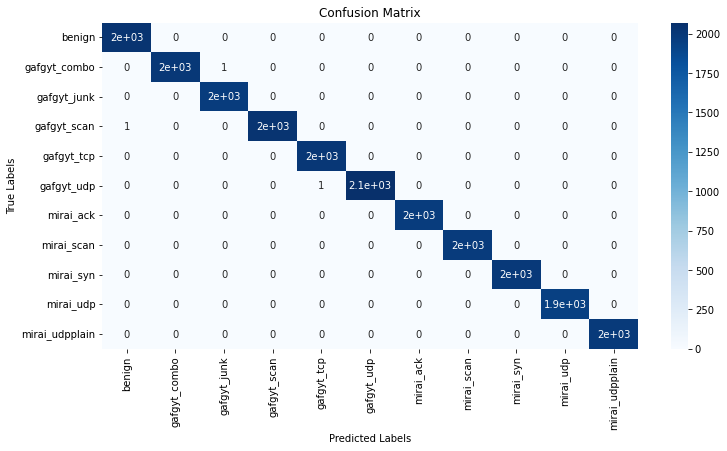

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = rfc.predict(X_test)

# create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


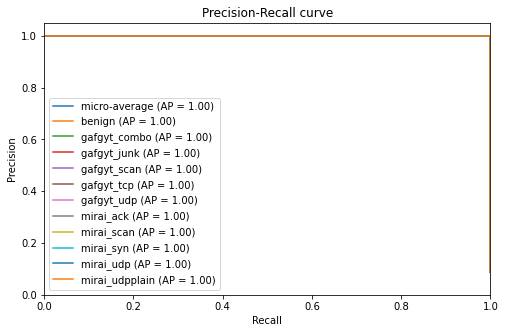

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = rfc.predict_proba(X_test)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test1 = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test1[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test1[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test1.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test1, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create an instance of the SVM classifier
svm = SVC(kernel='linear')

# fit the model to the training data
svm.fit(X_train, y_train)




SVC(kernel='linear')

In [ ]:
# predict the class labels for the test data
y_pred = svm.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8638636363636364


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = svm.predict(X_test)

# print the classification report
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       0.77      0.78      0.78      2002
   gafgyt_junk       0.77      0.76      0.77      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       0.49      1.00      0.66      2011
    gafgyt_udp       1.00      0.00      0.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           0.86     22000
     macro avg       0.91      0.87      0.84     22000
  weighted avg       0.91      0.86      0.83     22000



Text(0.5, 1.0, 'Confusion Matrix')

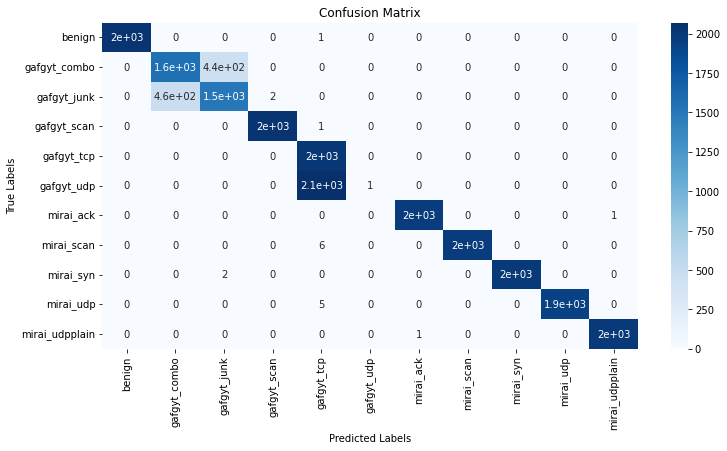

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = svm.predict(X_test)

# create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


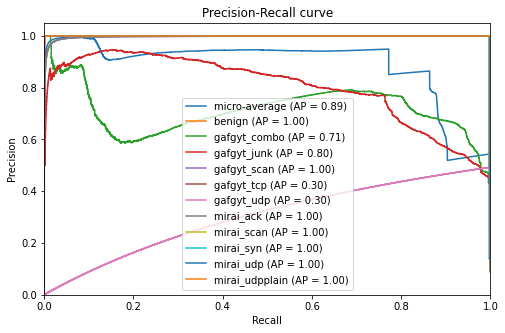

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = svm.decision_function(X_test)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test1 = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test1[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test1[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test1.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test1, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
3plt.show()

#Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train the model on the scaled data
nb.fit(X_train_scaled, y_train)

# evaluate the model on the test data
accuracy = nb.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6238181818181818


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = nb.predict(X_test_scaled)

# print the classification report
report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        benign       0.99      1.00      0.99      2037
  gafgyt_combo       0.32      0.52      0.40      2002
   gafgyt_junk       0.54      0.56      0.55      1968
   gafgyt_scan       0.99      0.99      0.99      2034
    gafgyt_tcp       0.49      1.00      0.66      2011
    gafgyt_udp       0.33      0.00      0.00      2072
     mirai_ack       0.62      0.41      0.50      1973
    mirai_scan       0.75      1.00      0.85      1974
     mirai_syn       0.00      0.00      0.00      1997
     mirai_udp       0.62      0.39      0.48      1943
mirai_udpplain       0.59      1.00      0.74      1989

      accuracy                           0.62     22000
     macro avg       0.57      0.62      0.56     22000
  weighted avg       0.57      0.62      0.56     22000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Confusion Matrix')

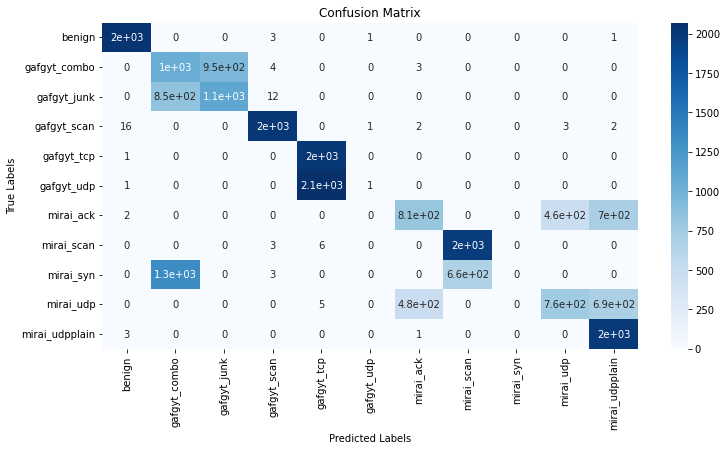

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = nb.predict(X_test_scaled)

# create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

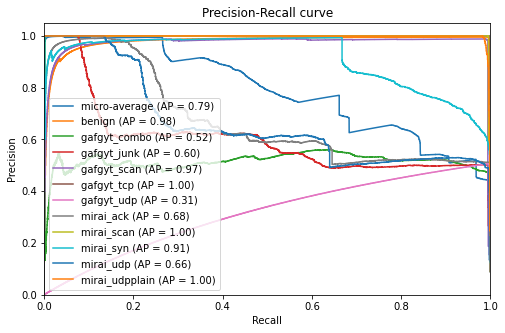

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = nb.predict_proba(X_test_scaled)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test1 = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test1[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test1[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test1.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test1, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create a K-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# train the model using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9986818181818182


Text(0.5, 1.0, 'Confusion Matrix')

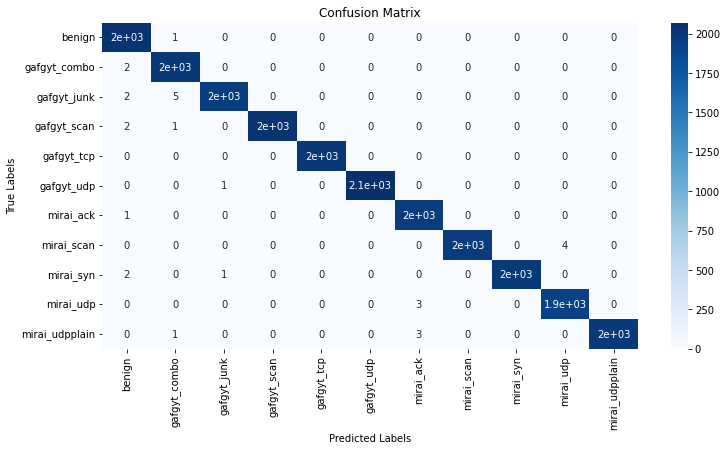

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = knn.predict(X_test)

# create the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = knn.predict(X_test)

# print the classification report
report = classification_report(y_test, y_pred)
print(report)

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       1.00      1.00      1.00      2002
   gafgyt_junk       1.00      1.00      1.00      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       1.00      1.00      1.00      2011
    gafgyt_udp       1.00      1.00      1.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           1.00     22000
     macro avg       1.00      1.00      1.00     22000
  weighted avg       1.00      1.00      1.00     22000



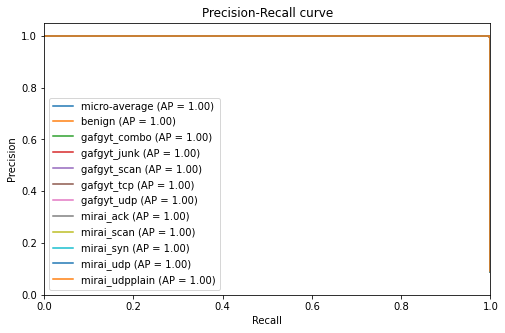

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = knn.predict_proba(X_test)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test1 = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test1[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test1[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test1.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test1, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#XGBBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder

# encode the labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# create the XGBoost classifier
xgb = XGBClassifier()

# fit the model to the training data
xgb.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score
y_test_encoded = label_encoder.fit_transform(y_test)
# predict the class labels for the test data
y_pred = xgb.predict(X_test)

# compute the test accuracy
accuracy = accuracy_score(y_test_encoded , y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9998181818181818


Text(0.5, 1.0, 'Confusion Matrix')

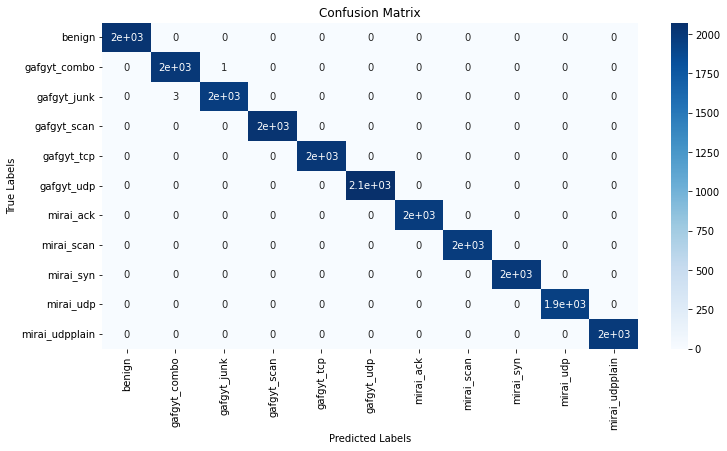

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# assume 'model' and 'X_test' are the trained model and test data from the previous example
# assume 'target_names' is a list of the class names in the order they appear in the output column

# make predictions on the test data

# create a new figure with a larger size
plt.figure(figsize=(12, 6))

class_names = ['benign', 'gafgyt_combo', 'gafgyt_junk', 'gafgyt_scan',
               'gafgyt_tcp', 'gafgyt_udp', 'mirai_ack', 'mirai_scan', 'mirai_syn',
               'mirai_udp', 'mirai_udpplain']

y_pred = xgb.predict(X_test)

# create the confusion matrix
matrix = confusion_matrix(y_test_encoded, y_pred)

# create a heatmap of the confusion matrix with labeled axes
sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=class_names , yticklabels=class_names )

# add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# assume 'model' is the trained model from the previous example

# make predictions on the test data
y_pred = xgb.predict(X_test)

# print the classification report
report = classification_report(y_test_encoded, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2037
           1       1.00      1.00      1.00      2002
           2       1.00      1.00      1.00      1968
           3       1.00      1.00      1.00      2034
           4       1.00      1.00      1.00      2011
           5       1.00      1.00      1.00      2072
           6       1.00      1.00      1.00      1973
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1997
           9       1.00      1.00      1.00      1943
          10       1.00      1.00      1.00      1989

    accuracy                           1.00     22000
   macro avg       1.00      1.00      1.00     22000
weighted avg       1.00      1.00      1.00     22000



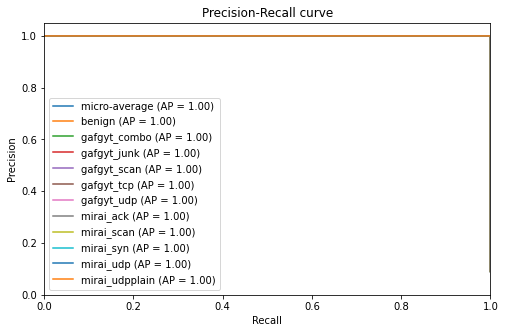

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)

# compute the precision-recall curve and average precision score for each class
# convert class labels to binary matrix
y_test1 = label_binarize(y_test, classes=class_names)

# compute the precision-recall curve for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(class_names)):
    precision[i], recall[i], _ = precision_recall_curve(y_test1[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test1[:, i], y_pred_proba[:, i])


# compute the micro-average precision-recall curve and average precision score
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test1.ravel(), y_pred_proba.ravel())
average_precision["micro"] = average_precision_score(y_test1, y_pred_proba, average="micro")

# plot the precision-recall curves for each class and the micro-average curve
plt.figure(figsize=(8, 5))
plt.step(recall['micro'], precision['micro'], where='post', label='micro-average (AP = {0:0.2f})'.format(average_precision["micro"]))
for i in range(len(class_names)):
    plt.step(recall[i], precision[i], where='post', label='{0} (AP = {1:0.2f})'.format(class_names[i], average_precision[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

#Deep learning

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-0.46005422, -0.63845734, -0.58072413, ..., -0.01741636,
        -0.01589747, -0.02253889],
       [-0.39380358, -0.3189112 ,  0.52766318, ..., -0.01741636,
        -0.01589747, -0.02253889],
       [-1.31325576, -0.63846475, -0.58072483, ..., -0.01741636,
        -0.01589747, -0.02253889],
       ...,
       [ 0.44136216,  0.73545257,  1.97905534, ..., -0.01741636,
        -0.01589747, -0.02253889],
       [-1.26983927, -0.34289803, -0.58072482, ..., -0.01741636,
        -0.01589747, -0.02253889],
       [ 1.29093892, -0.53976012, -0.58069756, ..., -0.01741636,
        -0.01589747, -0.02253889]])

In [ ]:
X_test.shape

(22000, 115)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create label encoder object
le = LabelEncoder()

# fit and transform y_train
y_train = le.fit_transform(y_train)

# transform y_test
y_test = le.transform(y_test)

# convert y_train and y_test to categorical arrays
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np

# Convert labels to numerical values
label_dict = {label: i for i, label in enumerate(np.unique(y_train))}
y_train = np.array([label_dict[label] for label in y_train])
y_test = np.array([label_dict[label] for label in y_test])

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_dict), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])



Epoch 1/30
2200/2200 [==============================] - 9s 3ms/step - loss: 0.4166 - accuracy: 0.7664 - val_loss: 0.3928 - val_accuracy: 0.7616
Epoch 2/30
2200/2200 [==============================] - 8s 4ms/step - loss: 0.2971 - accuracy: 0.8277 - val_loss: 0.2882 - val_accuracy: 0.8364
Epoch 3/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2331 - accuracy: 0.8657 - val_loss: 0.2013 - val_accuracy: 0.8785
Epoch 4/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2049 - accuracy: 0.8782 - val_loss: 0.1744 - val_accuracy: 0.8953
Epoch 5/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.2365 - accuracy: 0.8560 - val_loss: 0.2074 - val_accuracy: 0.8777
Epoch 6/30
2200/2200 [==============================] - 8s 4ms/step - loss: 0.2010 - accuracy: 0.8794 - val_loss: 0.1710 - val_accuracy: 0.8884
Epoch 7/30
2200/2200 [==============================] - 7s 3ms/step - loss: 0.1799 - accuracy: 0.8873 - val_loss: 0.1668 - val_accuracy:

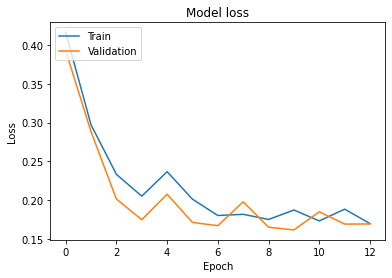

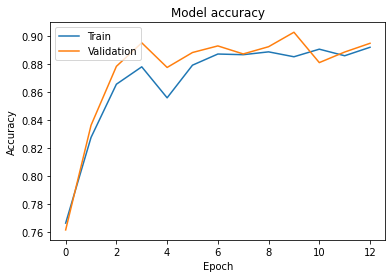

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


688/688 - 1s - loss: 0.1815 - accuracy: 0.8907 - 1s/epoch - 2ms/step
Test accuracy: 0.8907272815704346


In [ ]:
from sklearn.metrics import classification_report

# Convert the predicted probabilities to class labels
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=label_dict.keys()))


688/688 [==============================] - 1s 2ms/step
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       0.87      0.99      0.93      2002
   gafgyt_junk       0.98      0.86      0.92      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       0.49      1.00      0.66      2011
    gafgyt_udp       1.00      0.00      0.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           0.89     22000
     macro avg       0.94      0.89      0.86     22000
  weighted avg       0.94      0.89      0.86     22000



In [ ]:
y_train1 = np.array(list(map(lambda x: tuple(x), y_train)))
y_test1 = np.array(list(map(lambda x: tuple(x), y_test)))

# Convert labels to numerical values
label_dict = {label: i for i, label in enumerate(np.unique(y_train))}
y_train1 = np.array([label_dict[label] for label in y_train.ravel()])
y_test1 = np.array([label_dict[label] for label in y_test.ravel()])



688/688 [==============================] - 2s 3ms/step


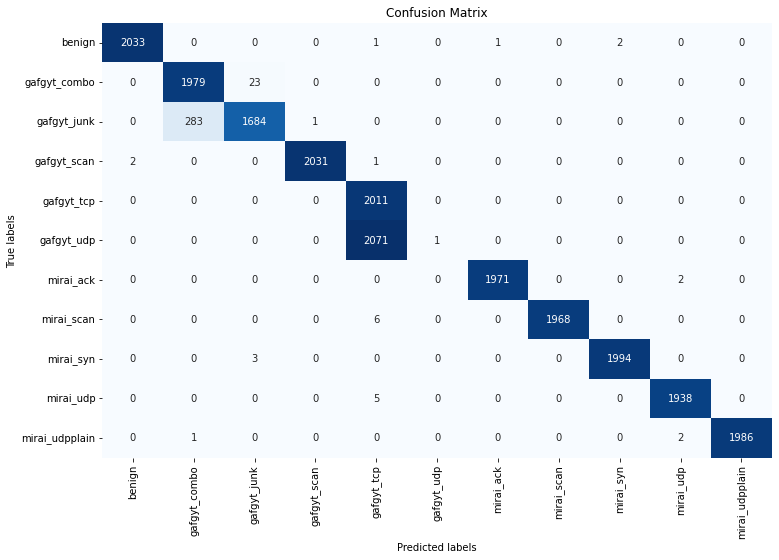

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted probabilities for each class
y_pred_probs = model.predict(X_test)

# Get the class with the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the list of class names
class_names = label_dict.keys()

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# set the x-axis tick labels to the class names
ax.yaxis.set_ticklabels(class_names,rotation=0)
#ax.xticks(range(len(class_names)), class_names, rotation=90)
ax.xaxis.set_ticklabels(class_names,rotation=90)

plt.show()


#RNN+CNN+LSTM

In [8]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(88000, 115)

In [10]:
import numpy as np

X=np.expand_dims(X_train,axis=-1)

In [11]:
X.shape

(88000, 115, 1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Create a sequential model
model = Sequential()

# Add the convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Add the LSTM layers
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))

# Add the classifier layers
model.add(Dense(units=11, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 113, 64)           256       
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 56, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 54, 128)           24704     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 27, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 25, 256)           98560     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 12, 256)         

In [44]:
label_to_int = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_int = np.array([label_to_int[label] for label in y_train])
y_test_int = np.array([label_to_int[label] for label in y_test])

y_train_onehot = to_categorical(y_train_int)
y_test_onehot = to_categorical(y_test_int)


In [45]:
history = model.fit(X_train, y_train_onehot, batch_size=64, epochs=30, validation_data=(X_test, y_test_onehot))

Epoch 1/30
1375/1375 [==============================] - 18s 10ms/step - loss: 0.5397 - accuracy: 0.7088 - val_loss: 0.4008 - val_accuracy: 0.7569
Epoch 2/30
1375/1375 [==============================] - 13s 10ms/step - loss: 0.3603 - accuracy: 0.7913 - val_loss: 0.2915 - val_accuracy: 0.8153
Epoch 3/30
1375/1375 [==============================] - 13s 10ms/step - loss: 0.2914 - accuracy: 0.8256 - val_loss: 0.2967 - val_accuracy: 0.8135
Epoch 4/30
1375/1375 [==============================] - 15s 11ms/step - loss: 0.2187 - accuracy: 0.8711 - val_loss: 0.1680 - val_accuracy: 0.8921
Epoch 5/30
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1720 - accuracy: 0.8907 - val_loss: 0.1745 - val_accuracy: 0.8893
Epoch 6/30
1375/1375 [==============================] - 15s 11ms/step - loss: 0.1761 - accuracy: 0.8911 - val_loss: 0.1530 - val_accuracy: 0.9021
Epoch 7/30
1375/1375 [==============================] - 13s 10ms/step - loss: 0.1534 - accuracy: 0.8993 - val_loss: 0.1452 -

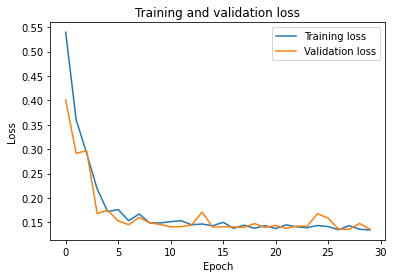

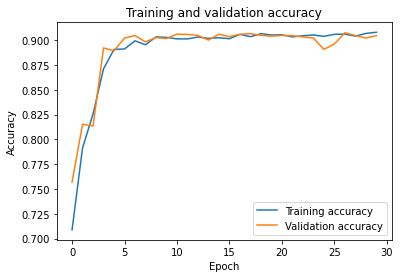

In [46]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
# Create reverse lookup dictionary for integer to label mapping
int_to_label = {i: label for label, i in label_to_int.items()}

# Transform integer-encoded predictions back to their original string labels
y_pred_labels = [int_to_label[np.argmax(pred)] for pred in y_pred]

# Print the classification report
target_names = list(label_to_int.keys())
print(classification_report(y_test, y_pred_labels, target_names=target_names))


                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       1.00      1.00      1.00      2002
   gafgyt_junk       1.00      1.00      1.00      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       0.49      1.00      0.66      2011
    gafgyt_udp       1.00      0.00      0.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           0.90     22000
     macro avg       0.95      0.91      0.88     22000
  weighted avg       0.95      0.90      0.87     22000



688/688 [==============================] - 4s 5ms/step


Text(0.5, 1.0, 'Confusion Matrix')

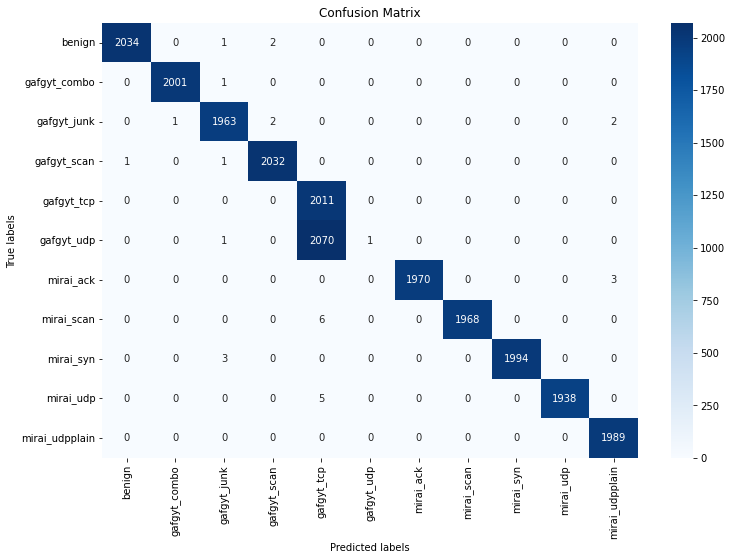

In [53]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
fig, ax = plt.subplots(figsize=(12, 8))



# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)

# Create a list of label names from the label encoder
label_names = list(label_to_int.keys())

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Build the CNN model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=11, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the CNN model
model.fit(X_train, y_train_onehot, epochs=30, batch_size=64, validation_data=(X_test, y_test_onehot))

# Convert CNN model predictions to input for XGB
X_train_cnn = model.predict(X_train)
X_test_cnn = model.predict(X_test)

# Convert string labels to integer labels
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train)
y_test_xgb = label_encoder.transform(y_test)

# Train and evaluate XGB model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_cnn, y_train_xgb)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_19 (Conv1D)          (None, 113, 64)           256       
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 56, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_20 (Conv1D)          (None, 54, 128)           24704     
                                                                 
 max_pooling1d_19 (MaxPoolin  (None, 27, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_21 (Conv1D)          (None, 25, 256)           98560     
                                                                 
 max_pooling1d_20 (MaxPoolin  (None, 12, 256)         

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [56]:
# Predict labels on test set
y_pred_xgb = xgb_model.predict(X_test_cnn)

# Convert integer labels back to original string labels
y_pred = label_encoder.inverse_transform(y_pred_xgb)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

        benign       1.00      1.00      1.00      2037
  gafgyt_combo       1.00      1.00      1.00      2002
   gafgyt_junk       1.00      1.00      1.00      1968
   gafgyt_scan       1.00      1.00      1.00      2034
    gafgyt_tcp       1.00      1.00      1.00      2011
    gafgyt_udp       1.00      1.00      1.00      2072
     mirai_ack       1.00      1.00      1.00      1973
    mirai_scan       1.00      1.00      1.00      1974
     mirai_syn       1.00      1.00      1.00      1997
     mirai_udp       1.00      1.00      1.00      1943
mirai_udpplain       1.00      1.00      1.00      1989

      accuracy                           1.00     22000
     macro avg       1.00      1.00      1.00     22000
  weighted avg       1.00      1.00      1.00     22000



#Skipping Connections

In [69]:
# First convolutional block
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
pool1 = MaxPooling1D(pool_size=2)(conv1)
skip1 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
skip2 = Add()([skip1, conv3])

# Second convolutional block
pool2 = MaxPooling1D(pool_size=2)(skip2)
skip3 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
conv5 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv4)
skip4 = Add()([skip3, conv5])

# Third convolutional block
pool3 = MaxPooling1D(pool_size=2)(skip4)
skip5 = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(pool3)
conv6 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(pool3)
conv7 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv6)
skip6 = Add()([skip5, conv7])

# LSTM layers
lstm1 = LSTM(units=64, return_sequences=True)(skip6)
lstm2 = LSTM(units=32)(lstm1)

# Classifier layers
flatten = Flatten()(lstm2)
dense = Dense(units=11, activation='softmax')(flatten)

# Create the model
model = Model(inputs=inputs, outputs=dense)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [70]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 115, 1)]     0           []                               
                                                                                                  
 conv1d_38 (Conv1D)             (None, 115, 64)      256         ['input_10[0][0]']               
                                                                                                  
 max_pooling1d_27 (MaxPooling1D  (None, 57, 64)      0           ['conv1d_38[0][0]']              
 )                                                                                                
                                                                                                  
 conv1d_40 (Conv1D)             (None, 57, 128)      24704       ['max_pooling1d_27[0][0]'] 

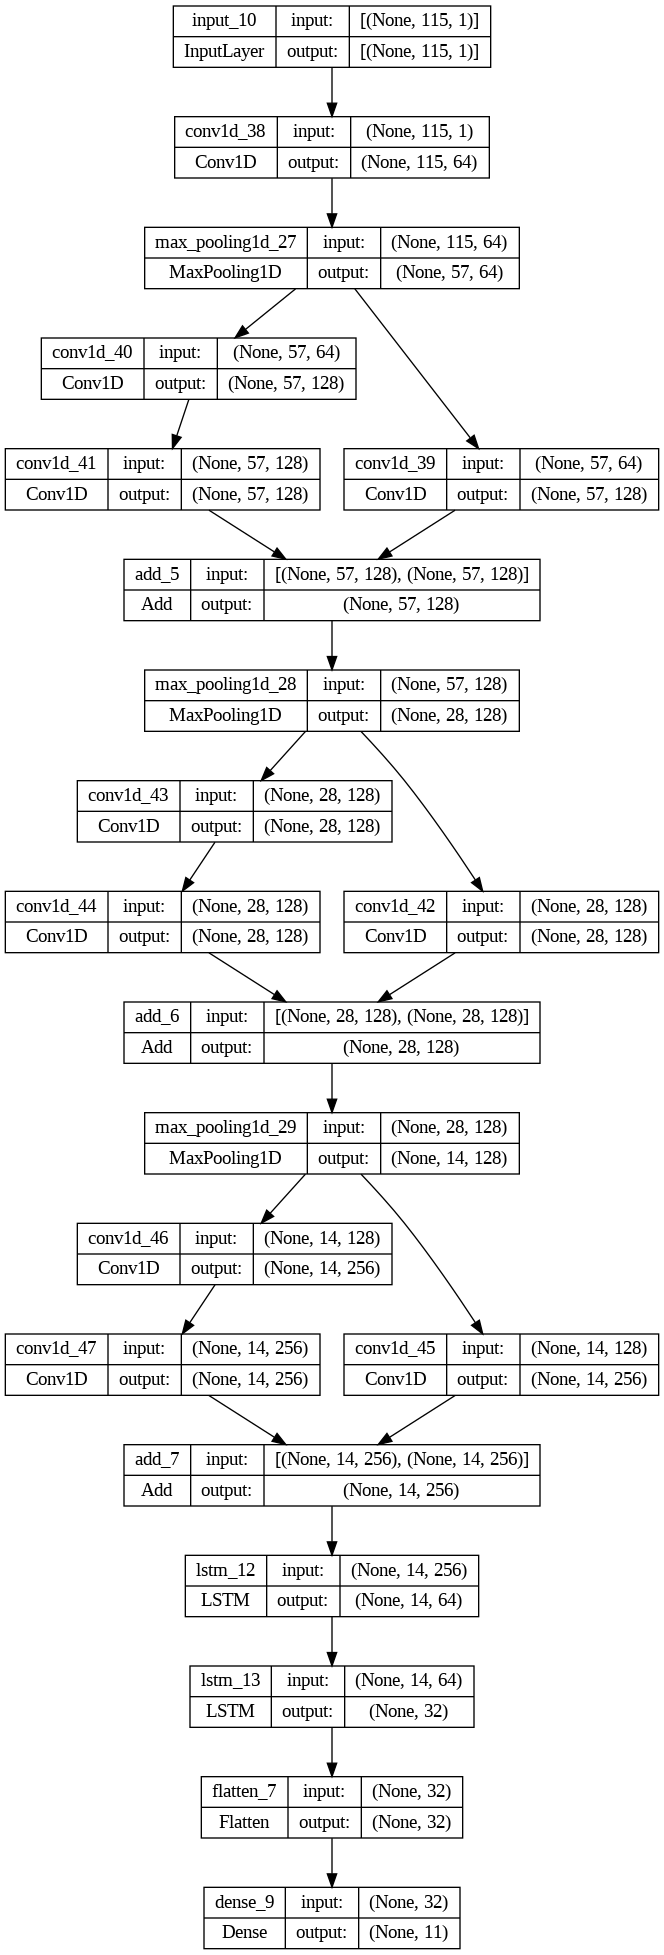

In [71]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [75]:
label_to_int = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_int = np.array([label_to_int[label] for label in y_train])
y_test_int = np.array([label_to_int[label] for label in y_test])

y_train_onehot = to_categorical(y_train_int)

y_test_onehot = to_categorical(y_test_int)

In [72]:
history = model.fit(X_train, y_train_onehot, batch_size=64, epochs=30, validation_data=(X_test, y_test_onehot))

Epoch 1/30
1375/1375 [==============================] - 28s 15ms/step - loss: 0.5581 - accuracy: 0.6908 - val_loss: 0.5610 - val_accuracy: 0.7045
Epoch 2/30
1375/1375 [==============================] - 20s 14ms/step - loss: 0.3843 - accuracy: 0.7692 - val_loss: 0.3324 - val_accuracy: 0.7983
Epoch 3/30
1375/1375 [==============================] - 22s 16ms/step - loss: 0.3432 - accuracy: 0.8055 - val_loss: 0.2768 - val_accuracy: 0.8252
Epoch 4/30
1375/1375 [==============================] - 19s 14ms/step - loss: 0.2938 - accuracy: 0.8287 - val_loss: 0.2530 - val_accuracy: 0.8645
Epoch 5/30
1375/1375 [==============================] - 20s 14ms/step - loss: 0.2425 - accuracy: 0.8672 - val_loss: 0.2139 - val_accuracy: 0.8676
Epoch 6/30
1375/1375 [==============================] - 19s 14ms/step - loss: 0.2166 - accuracy: 0.8755 - val_loss: 0.2261 - val_accuracy: 0.8562
Epoch 7/30
1375/1375 [==============================] - 20s 14ms/step - loss: 0.2028 - accuracy: 0.8834 - val_loss: 0.1698 -

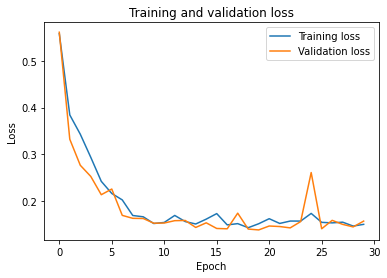

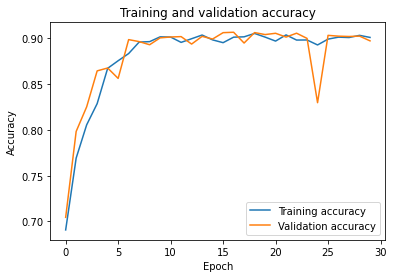

In [73]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test_int, y_pred_int))


688/688 [==============================] - 5s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2037
           1       0.99      0.90      0.94      2002
           2       0.91      0.99      0.95      1968
           3       1.00      1.00      1.00      2034
           4       0.00      0.00      0.00      2011
           5       0.51      1.00      0.67      2072
           6       1.00      1.00      1.00      1973
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1997
           9       1.00      1.00      1.00      1943
          10       1.00      1.00      1.00      1989

    accuracy                           0.90     22000
   macro avg       0.85      0.90      0.87     22000
weighted avg       0.85      0.90      0.87     22000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


688/688 [==============================] - 6s 9ms/step


Text(0.5, 1.0, 'Confusion Matrix')

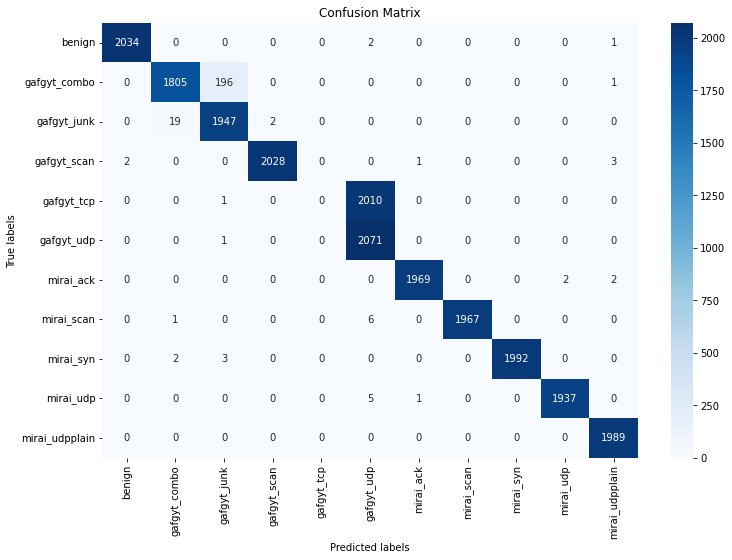

In [81]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
fig, ax = plt.subplots(figsize=(12, 8))



# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)

# Create a list of label names from the label encoder
label_names = list(label_to_int.keys())

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


#Keras Tuner

In [10]:
X=np.expand_dims(X_train,axis=-1)
X_train.shape

(88000, 115)

In [11]:
# Reshape X_train to have an additional dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(88000, 115, 1)

In [14]:
import keras_tuner

In [12]:
from tensorflow.keras.layers import Input,Add,Flatten,LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import History
import kerastuner
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

#inputs = (115, 1)
inputs = Input(shape=(115,1,))

C:\Users\umair\AppData\Local\Temp\ipykernel_10396\992261810.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperParameters

def build_model(hp):

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    skip1 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
    conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
    skip2 = Add()([skip1, conv3])

    # Second convolutional block
    pool2 = MaxPooling1D(pool_size=2)(skip2)
    skip3 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
    conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
    conv5 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv4)
    skip4 = Add()([skip3, conv5])

    # Third convolutional block
    pool3 = MaxPooling1D(pool_size=2)(skip4)
    skip5 = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(pool3)
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(pool3)
    conv7 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv6)
    skip6 = Add()([skip5, conv7])

    # LSTM layers
    lstm1 = LSTM(units=64, return_sequences=True)(skip6)
    lstm2 = LSTM(units=32)(lstm1)

    # Classifier layers
    flatten = Flatten()(lstm2)
    dense= Dense(units=64, activation='relu')(flatten)
    dense= Dense(units=64, activation='relu')(dense)
    dense = Dense(units=11, activation='softmax')(dense)

    # Create the model
    model = Model(inputs=inputs, outputs=dense)
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
    model.compile(optimizer=Adam(learning_rate=lr),   loss='categorical_crossentropy',   metrics=['accuracy'])
    return model


In [20]:
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [13]:
from keras.utils import to_categorical
label_to_int = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_int = np.array([label_to_int[label] for label in y_train])
y_test_int = np.array([label_to_int[label] for label in y_test])

y_train_onehot = to_categorical(y_train_int)

y_test_onehot = to_categorical(y_test_int)

In [27]:
# Define the search space and run the search
from kerastuner import RandomSearch
tuner = RandomSearch( build_model, objective='val_accuracy',  max_trials=10,  directory=r'B:\NbIoT keras tuner', project_name='kerastuner')

In [48]:
tuner.search(X_train, y_train_onehot, batch_size=64, epochs=50, validation_data=(X_test, y_test_onehot),
            verbose=1, use_multiprocessing=True, workers=4, max_queue_size=4)

Trial 6 Complete [00h 10m 19s]
val_accuracy: 0.9036363363265991

Best val_accuracy So Far: 0.9075454473495483
Total elapsed time: 01h 00m 35s
INFO:tensorflow:Oracle triggered exit


In [49]:
tuner.results_summary()

Results summary
Results in B:\NbIoT keras tuner\kerastuner
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.9075454473495483

Trial 00 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.906499981880188

Trial 05 summary
Hyperparameters:
learning_rate: 1e-05
Score: 0.9036363363265991

Trial 01 summary
Hyperparameters:
learning_rate: 1e-06
Score: 0.884181797504425

Trial 03 summary
Hyperparameters:
learning_rate: 1e-07
Score: 0.3408636450767517

Trial 02 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.09418182075023651


In [116]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperParameters

def build_model(hp):

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    skip1 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
    conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
    skip2 = Add()([skip1, conv3])

    # Second convolutional block
    pool2 = MaxPooling1D(pool_size=2)(skip2)
    skip3 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
    conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
    conv5 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv4)
    skip4 = Add()([skip3, conv5])

    # Third convolutional block
    pool3 = MaxPooling1D(pool_size=2)(skip4)
    skip5 = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(pool3)
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(pool3)
    conv7 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv6)
    skip6 = Add()([skip5, conv7])

    # LSTM layers
    lstm1 = LSTM(units=64, return_sequences=True)(skip6)
    lstm2 = LSTM(units=32)(lstm1)

    # Classifier layers
    flatten = Flatten()(lstm2)
    dense= Dense(hp.Choice('units', [32, 64, 128]), activation='relu')(flatten)    
    dense= Dense(hp.Choice('units', [32, 64, 128]), activation='relu')(dense)
    dense = Dense(units=11, activation='softmax')(dense)

    # Create the model
    model = Model(inputs=inputs, outputs=dense)
   
    model.compile(optimizer=Adam(learning_rate= 0.0001),   loss='categorical_crossentropy',   metrics=['accuracy'])
    return model

In [117]:
# Define the search space and run the search
from kerastuner import RandomSearch
tuner = RandomSearch( build_model, objective='val_accuracy',  max_trials=10,  directory=r'B:\NbIoT keras tuner\kerastunerdense', project_name='kerastunerdense')

In [118]:
tuner.search(X_train, y_train_onehot, batch_size=64, epochs=50, validation_data=(X_test, y_test_onehot),
            verbose=1, use_multiprocessing=True, workers=4, max_queue_size=4)

Trial 3 Complete [00h 09m 56s]
val_accuracy: 0.9075000286102295

Best val_accuracy So Far: 0.9077273011207581
Total elapsed time: 00h 30m 18s
INFO:tensorflow:Oracle triggered exit


In [119]:
tuner.results_summary()

Results summary
Results in B:\NbIoT keras tuner\kerastunerdense\kerastunerdense
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units: 64
Score: 0.9077273011207581

Trial 00 summary
Hyperparameters:
units: 128
Score: 0.9075000286102295

Trial 02 summary
Hyperparameters:
units: 32
Score: 0.9075000286102295


In [121]:
def build_model(hp):

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    skip1 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
    conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
    skip2 = Add()([skip1, conv3])

    # Second convolutional block
    pool2 = MaxPooling1D(pool_size=2)(skip2)
    skip3 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
    conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
    conv5 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv4)
    skip4 = Add()([skip3, conv5])

    # Third convolutional block
    pool3 = MaxPooling1D(pool_size=2)(skip4)
    skip5 = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(pool3)
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(pool3)
    conv7 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv6)
    skip6 = Add()([skip5, conv7])

    # LSTM layers
    lstm1 = LSTM(hp.Choice('units', [32, 64, 128]), return_sequences=True)(skip6)
    lstm2 = LSTM(hp.Choice('units', [32, 64, 128]))(lstm1)

    # Classifier layers
    flatten = Flatten()(lstm2)
    dense= Dense(64, activation='relu')(flatten)    
    dense= Dense(64, activation='relu')(dense)
    dense = Dense(units=11, activation='softmax')(dense)

    # Create the model
    model = Model(inputs=inputs, outputs=dense)
   
    model.compile(optimizer=Adam(learning_rate= 0.0001),   loss='categorical_crossentropy',   metrics=['accuracy'])
    return model

In [122]:
# Define the search space and run the search
from kerastuner import RandomSearch
tuner = RandomSearch( build_model, objective='val_accuracy',  max_trials=10,  directory=r'B:\NbIoT keras tuner\kerastunerLSTM', project_name='kerastunerLSTM')

In [123]:
tuner.search(X_train, y_train_onehot, batch_size=64, epochs=50, validation_data=(X_test, y_test_onehot),
            verbose=1, use_multiprocessing=True, workers=4, max_queue_size=4)

Trial 3 Complete [00h 11m 14s]
val_accuracy: 0.907590925693512

Best val_accuracy So Far: 0.9076363444328308
Total elapsed time: 00h 31m 43s
INFO:tensorflow:Oracle triggered exit


In [125]:
tuner.results_summary()

Results summary
Results in B:\NbIoT keras tuner\kerastunerLSTM\kerastunerLSTM
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 00 summary
Hyperparameters:
units: 64
Score: 0.9076363444328308

Trial 02 summary
Hyperparameters:
units: 128
Score: 0.907590925693512

Trial 01 summary
Hyperparameters:
units: 32
Score: 0.9075000286102295


In [14]:
def build_model():

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(inputs)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    skip1 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool1)
    conv2 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool1)
    conv3 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv2)
    skip2 = Add()([skip1, conv3])

    # Second convolutional block
    pool2 = MaxPooling1D(pool_size=2)(skip2)
    skip3 = Conv1D(filters=128, kernel_size=1, activation='relu', padding='same')(pool2)
    conv4 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(pool2)
    conv5 = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(conv4)
    skip4 = Add()([skip3, conv5])

    # Third convolutional block
    pool3 = MaxPooling1D(pool_size=2)(skip4)
    skip5 = Conv1D(filters=256, kernel_size=1, activation='relu', padding='same')(pool3)
    conv6 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(pool3)
    conv7 = Conv1D(filters=256, kernel_size=3, activation='relu', padding='same')(conv6)
    skip6 = Add()([skip5, conv7])

    # LSTM layers
    lstm1 = LSTM(64, return_sequences=True)(skip6)
    lstm2 = LSTM(64)(lstm1)

    # Classifier layers
    flatten = Flatten()(lstm2)
    dense= Dense(64, activation='relu')(flatten)    
    dense= Dense(64, activation='relu')(dense)
    dense = Dense(units=11, activation='softmax')(dense)

    # Create the model
    model = Model(inputs=inputs, outputs=dense)
   
    model.compile(optimizer=Adam(learning_rate= 0.0001),   loss='categorical_crossentropy',   metrics=['accuracy'])
    return model

In [15]:
model=build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 115, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 115, 64)      256         ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 57, 64)       0           ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 57, 128)      24704       ['max_pooling1d[0][0]']          
                                                                                              

In [16]:
import os
# Save the model to a file
model.save(r'C:\Users\umair\OneDrive\Desktop\IoT\modelsize\Modelbeforetraining size.h5')

# Get the size of the model file in kilobytes
model_size_kb = os.path.getsize(r'C:\Users\umair\OneDrive\Desktop\IoT\modelsize\Modelbeforetraining size.h5') / 1024

# Print the model size in kilobytes
print(f"Model size: {model_size_kb:.2f} KB")

Model size: 2617.85 KB


In [17]:
history = model.fit(X_train, y_train_onehot, batch_size=64, epochs=150, validation_data=(X_test, y_test_onehot))

Epoch 1/150
1375/1375 [==============================] - 19s 10ms/step - loss: 0.6836 - accuracy: 0.6788 - val_loss: 0.4061 - val_accuracy: 0.7506
Epoch 2/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.3668 - accuracy: 0.7836 - val_loss: 0.3349 - val_accuracy: 0.8156
Epoch 3/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.3104 - accuracy: 0.8240 - val_loss: 0.2687 - val_accuracy: 0.8663
Epoch 4/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.2474 - accuracy: 0.8598 - val_loss: 0.1894 - val_accuracy: 0.8875
Epoch 5/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.2257 - accuracy: 0.8717 - val_loss: 0.2219 - val_accuracy: 0.8775
Epoch 6/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1958 - accuracy: 0.8827 - val_loss: 0.1710 - val_accuracy: 0.8962
Epoch 7/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1948 - accuracy: 0.8835 - val_loss: 0

1375/1375 [==============================] - 13s 10ms/step - loss: 0.1287 - accuracy: 0.9082 - val_loss: 0.1348 - val_accuracy: 0.9049
Epoch 57/150
1375/1375 [==============================] - 13s 10ms/step - loss: 0.1303 - accuracy: 0.9089 - val_loss: 0.1358 - val_accuracy: 0.9074
Epoch 58/150
1375/1375 [==============================] - 13s 10ms/step - loss: 0.1305 - accuracy: 0.9082 - val_loss: 0.1422 - val_accuracy: 0.9067
Epoch 59/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1392 - accuracy: 0.9059 - val_loss: 0.1344 - val_accuracy: 0.9051
Epoch 60/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1297 - accuracy: 0.9084 - val_loss: 0.1385 - val_accuracy: 0.9055
Epoch 61/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1284 - accuracy: 0.9081 - val_loss: 0.1613 - val_accuracy: 0.8984
Epoch 62/150
1375/1375 [==============================] - 14s 10ms/step - loss: 0.1299 - accuracy: 0.9081 - val_loss: 0.1356 

1375/1375 [==============================] - 13s 10ms/step - loss: 0.1294 - accuracy: 0.9089 - val_loss: 0.4483 - val_accuracy: 0.8736
Epoch 112/150
1375/1375 [==============================] - 13s 9ms/step - loss: 0.1296 - accuracy: 0.9086 - val_loss: 0.1348 - val_accuracy: 0.9076
Epoch 113/150
1375/1375 [==============================] - 13s 10ms/step - loss: 0.1273 - accuracy: 0.9090 - val_loss: 0.1344 - val_accuracy: 0.9050
Epoch 114/150
1375/1375 [==============================] - 13s 9ms/step - loss: 0.1301 - accuracy: 0.9076 - val_loss: 0.1348 - val_accuracy: 0.9050
Epoch 115/150
1375/1375 [==============================] - 13s 9ms/step - loss: 0.1284 - accuracy: 0.9100 - val_loss: 0.1354 - val_accuracy: 0.9074
Epoch 116/150
1375/1375 [==============================] - 13s 9ms/step - loss: 0.1278 - accuracy: 0.9084 - val_loss: 0.1349 - val_accuracy: 0.9076
Epoch 117/150
1375/1375 [==============================] - 13s 10ms/step - loss: 0.1282 - accuracy: 0.9090 - val_loss: 0.135

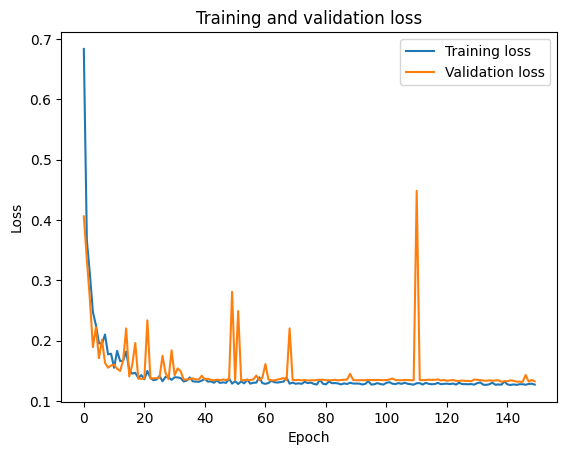

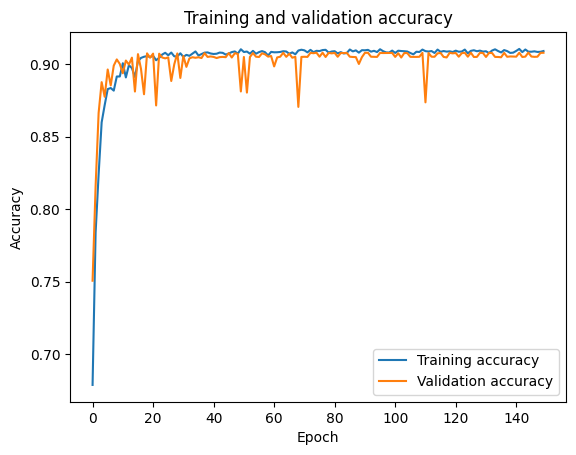

In [18]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report

# Get the predictions for the test set
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

# Print the classification report
print(classification_report(y_test_int, y_pred_int))


688/688 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2037
           1       1.00      1.00      1.00      2002
           2       1.00      1.00      1.00      1968
           3       1.00      1.00      1.00      2034
           4       0.50      0.00      0.00      2011
           5       0.51      1.00      0.67      2072
           6       1.00      1.00      1.00      1973
           7       1.00      1.00      1.00      1974
           8       1.00      1.00      1.00      1997
           9       1.00      1.00      1.00      1943
          10       1.00      1.00      1.00      1989

    accuracy                           0.91     22000
   macro avg       0.91      0.91      0.88     22000
weighted avg       0.91      0.91      0.88     22000



688/688 [==============================] - 2s 3ms/step


Text(0.5, 1.0, 'Confusion Matrix')

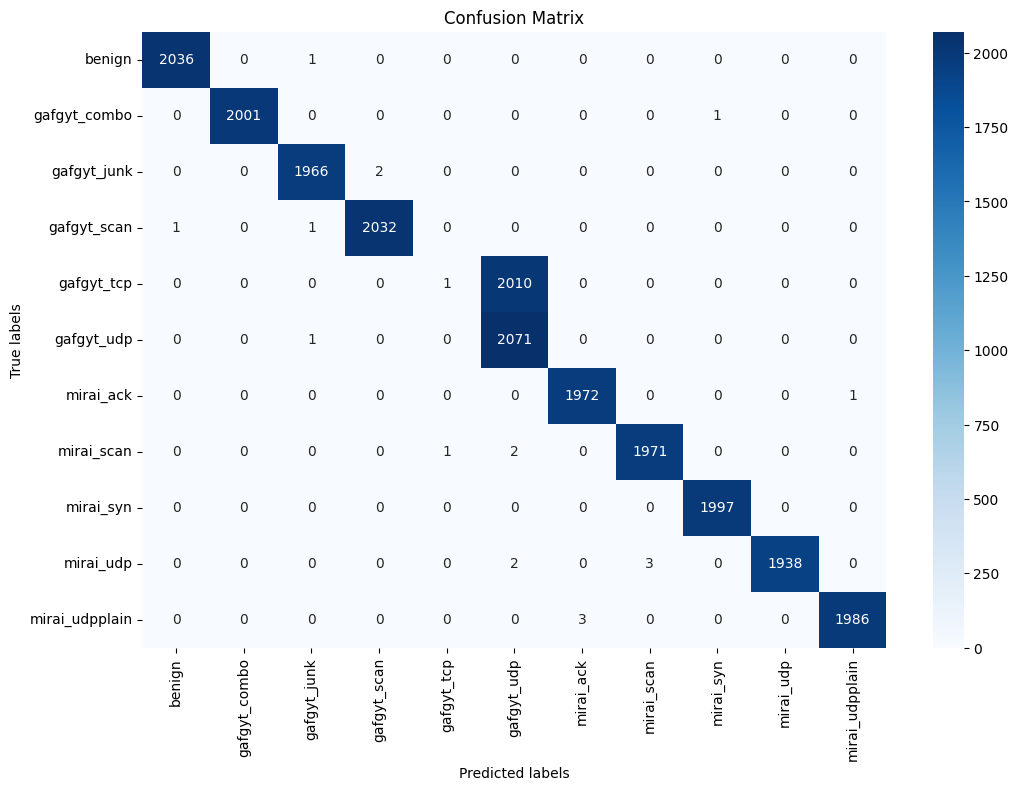

In [22]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)
fig, ax = plt.subplots(figsize=(12, 8))



# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_int, y_pred_int)

# Create a list of label names from the label encoder
label_names = list(label_to_int.keys())

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [23]:
y_pred = model.predict(X_test)

688/688 [==============================] - 2s 3ms/step


688/688 [==============================] - 2s 3ms/step


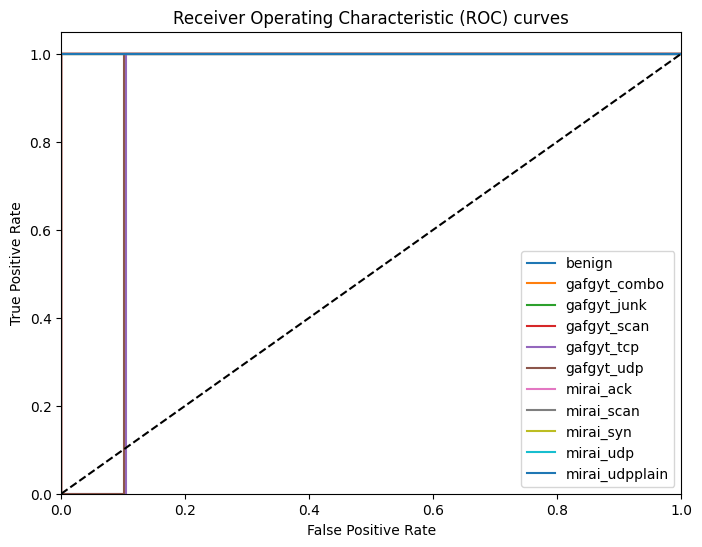

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtain predicted probabilities for each class
y_pred_prob = model.predict(X_test)
label_names = list(label_to_int.keys())
# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = y_test_onehot.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=label_names[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")
plt.show()

# Create a list of label names from the label encoder
label_names = list(label_to_int.keys())


AUC score for class 'benign': 1.000
AUC score for class 'gafgyt_combo': 1.000
AUC score for class 'gafgyt_junk': 1.000
AUC score for class 'gafgyt_scan': 1.000
AUC score for class 'gafgyt_tcp': 0.896
AUC score for class 'gafgyt_udp': 0.899
AUC score for class 'mirai_ack': 1.000
AUC score for class 'mirai_scan': 1.000
AUC score for class 'mirai_syn': 1.000
AUC score for class 'mirai_udp': 1.000
AUC score for class 'mirai_udpplain': 1.000


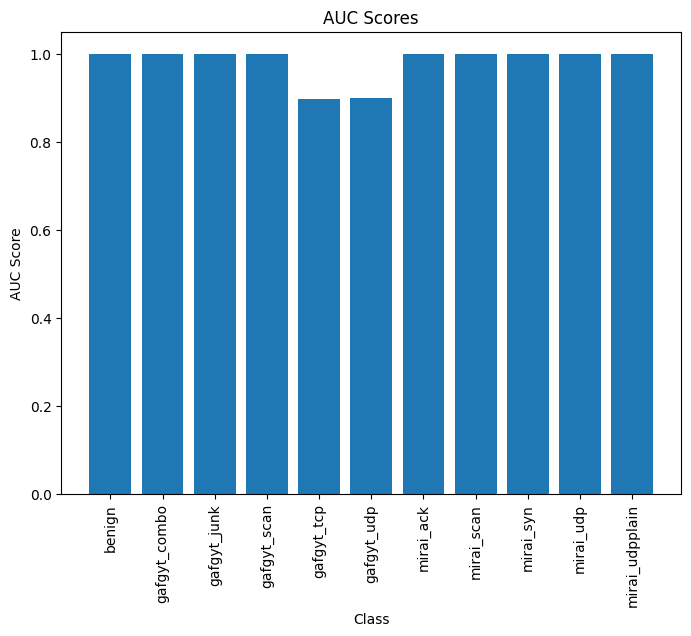

In [34]:
# Create a list of label names from the label encoder
label_names = list(label_to_int.keys())


# Compute and print the AUC score for each class
auc_scores = []
for i in range(n_classes):
    auc_score = auc(fpr[i], tpr[i])
    auc_scores.append(auc_score)
    print(f"AUC score for class '{label_names[i]}': {auc_score:.3f}")

# Plot the AUC scores for each class as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(label_names, auc_scores)
plt.xticks(rotation=90) 
plt.title('AUC Scores')
plt.xlabel('Class')
plt.ylabel('AUC Score')

# Show plots
plt.show()


In [38]:
from sklearn.metrics import cohen_kappa_score

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_onehot, axis=1)

for i in range(n_classes):
    kappa = cohen_kappa_score(y_test_labels == i, y_pred_labels == i)
    print(f"Class {label_names[i]}: Kappa coefficient = {kappa:.4f}")



Class benign: Kappa coefficient = 0.9995
Class gafgyt_combo: Kappa coefficient = 0.9997
Class gafgyt_junk: Kappa coefficient = 0.9986
Class gafgyt_scan: Kappa coefficient = 0.9989
Class gafgyt_tcp: Kappa coefficient = 0.0008
Class gafgyt_udp: Kappa coefficient = 0.6260
Class mirai_ack: Kappa coefficient = 0.9989
Class mirai_scan: Kappa coefficient = 0.9983
Class mirai_syn: Kappa coefficient = 0.9997
Class mirai_udp: Kappa coefficient = 0.9986
Class mirai_udpplain: Kappa coefficient = 0.9989


Class benign: Kappa coefficient = 0.9995
Class gafgyt_combo: Kappa coefficient = 0.9997
Class gafgyt_junk: Kappa coefficient = 0.9986
Class gafgyt_scan: Kappa coefficient = 0.9989
Class gafgyt_tcp: Kappa coefficient = 0.0008
Class gafgyt_udp: Kappa coefficient = 0.6260
Class mirai_ack: Kappa coefficient = 0.9989
Class mirai_scan: Kappa coefficient = 0.9983
Class mirai_syn: Kappa coefficient = 0.9997
Class mirai_udp: Kappa coefficient = 0.9986
Class mirai_udpplain: Kappa coefficient = 0.9989


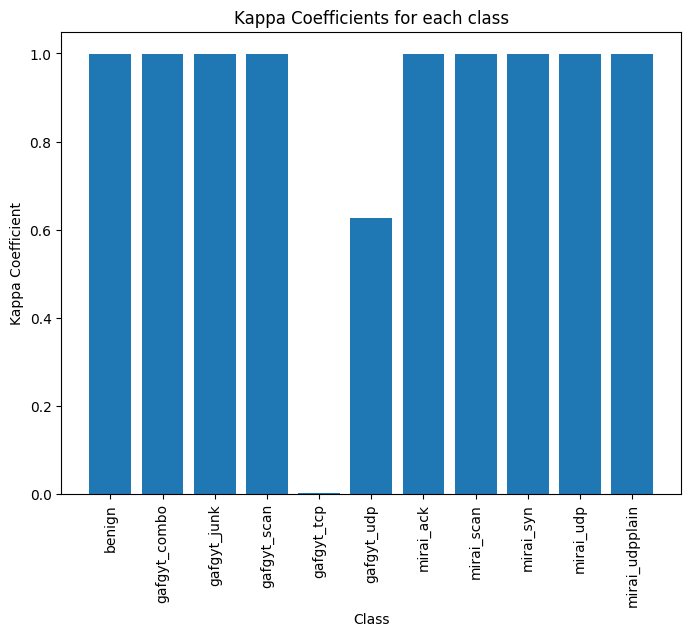

In [39]:
from sklearn.metrics import cohen_kappa_score

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_onehot, axis=1)

kappa_scores = {}
for i in range(n_classes):
    kappa = cohen_kappa_score(y_test_labels == i, y_pred_labels == i)
    kappa_scores[label_names[i]] = kappa
    print(f"Class {label_names[i]}: Kappa coefficient = {kappa:.4f}")

# Plot the kappa coefficients as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(kappa_scores.keys(), kappa_scores.values())
plt.title("Kappa Coefficients for each class")
plt.xlabel("Class")
plt.ylabel("Kappa Coefficient")
plt.xticks(rotation=90)
plt.show()


In [40]:
from sklearn.metrics import matthews_corrcoef

y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_onehot, axis=1)

for i in range(n_classes):
    mcc = matthews_corrcoef(y_test_labels == i, y_pred_labels == i)
    print(f"Class {label_names[i]}: MCC = {mcc:.4f}")


Class benign: MCC = 0.9995
Class gafgyt_combo: MCC = 0.9997
Class gafgyt_junk: MCC = 0.9986
Class gafgyt_scan: MCC = 0.9989
Class gafgyt_tcp: MCC = 0.0135
Class gafgyt_udp: MCC = 0.6749
Class mirai_ack: MCC = 0.9989
Class mirai_scan: MCC = 0.9983
Class mirai_syn: MCC = 0.9997
Class mirai_udp: MCC = 0.9986
Class mirai_udpplain: MCC = 0.9989
